In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
 Created on WED MAR 15 2023
                                                                        
 @author : Sabarish.R
 @python : 3.8.10
 @pip    : 22.1
"""

# Prerequisites
# pandas, numpy, scipy, matplotlib, seaborn, sklearn,keras, tensorflow

'\n Created on WED MAR 15 2023\n\n @author : Sabarish.R\n @python : 3.8.10\n @pip    : 22.1\n'

In [2]:
# libraries used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import joblib
from jsonmerge import merge

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score

2023-03-21 15:06:55.203411: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 15:06:55.203481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Reading the dataset using pandas
airline_df = pd.read_csv('../dataset/airline_data.csv')
# 2a) Print at least five rows for a sanity check
airline_df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [4]:
# 2b) describe dataframe  and shape of the dataframe
print ("Dataframe shape - ",airline_df.shape)
# print ("Dataframe Describe - ",airline_df.describe)

Dataframe shape -  (25976, 24)


In [5]:
# dataframe describe
airline_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
# Missing value analysis
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25966 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [7]:
# Customer Type,Arrival Delay in Minutes having some missing values, so the non-null count varies
print("Count of missing values in Customer Type -",airline_df['Customer Type'].isnull().sum())

# Arrival Delay in Minutes having some missing values, so the non-null count varies
print("Count of missing values in Arrival Delay in Minutes -",airline_df['Arrival Delay in Minutes'].isnull().sum())

Count of missing values in Customer Type - 10
Count of missing values in Arrival Delay in Minutes - 83


In [8]:
# If there is no delay in minutes in airline mentioned as 0 in dataframe, so we can't consider missing values as 0 
# here avg,min,max cannot be considered for missing values due to bussiness requirements
# so we are removing the Missing values in both customer type and Arrival Delay in Minutes 

airline_df.dropna(axis=0,inplace=True)

# revalidating if NA value exits or not
print("Count of missing values in Customer Type -",airline_df['Customer Type'].isnull().sum())
print("Count of missing values in Arrival Delay in Minutes -",airline_df['Arrival Delay in Minutes'].isnull().sum())

Count of missing values in Customer Type - 0
Count of missing values in Arrival Delay in Minutes - 0


In [9]:
# Analyzing categorical Columns in the dataframe
cols = airline_df.columns
num_cols = airline_df._get_numeric_data().columns
categorical_col = list(set(cols) - set(num_cols))

categorical_col

['Type of Travel', 'Class', 'Customer Type', 'Gender', 'satisfaction']

In [10]:
# Validating the categorical values
for col in categorical_col:
    print (col , " - " , airline_df[col].unique())

Type of Travel  -  ['Business travel' 'Personal Travel']
Class  -  ['Eco' 'Business' 'Eco Plus' 'eco' 'Eco plus']
Customer Type  -  ['Loyal Customer' 'disloyal Customer' 'Disloyal Customer']
Gender  -  ['Female' 'Male']
satisfaction  -  ['satisfied' 'neutral or dissatisfied']


In [11]:
# we can see misspelled words in Class and Customer Type, By correctiong into actual
airline_df["Class"] = airline_df["Class"].replace("eco","Eco")
airline_df["Class"] = airline_df["Class"].replace("Eco plus","Eco Plus")

airline_df["Customer Type"] = airline_df["Customer Type"].replace("disloyal Customer","Disloyal Customer")

In [12]:
# Analyzing the dependent variable categories
print('dependent variable categories -' ,airline_df['satisfaction'].unique())

# count values of each categories 
print(airline_df['satisfaction'].value_counts())
# The above dependent variable seems almost equally distributed. So no imbalance treatment required

dependent variable categories - ['satisfied' 'neutral or dissatisfied']
neutral or dissatisfied    14520
satisfied                  11363
Name: satisfaction, dtype: int64


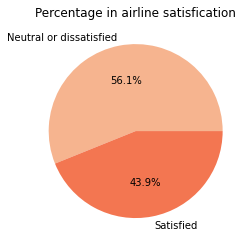

In [13]:
# airline satisfication in percentage
ax = plt.pie(airline_df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], 
        colors = sns.color_palette("rocket_r"), autopct = '%.1f%%')
plt.title("Percentage in airline satisfication")
plt.show()

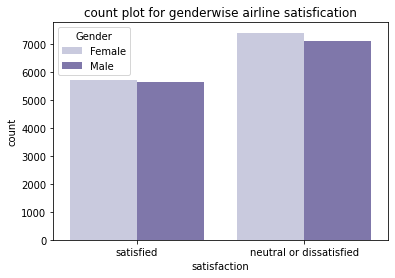

In [14]:
# count plot for genderwise airline satisfication
sns.countplot(x='satisfaction',hue='Gender',data=airline_df,palette='Purples')
plt.title("count plot for genderwise airline satisfication")
plt.show()

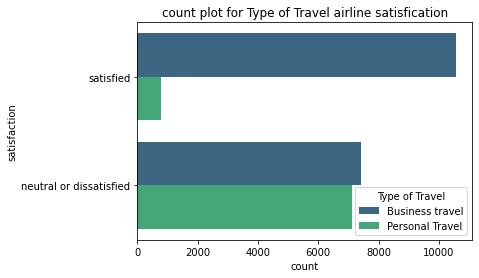

In [15]:
# count plot for Type of Travel airline satisfication
sns.countplot(y='satisfaction',hue='Type of Travel',data=airline_df,palette='viridis')
plt.title("count plot for Type of Travel airline satisfication")
plt.show()

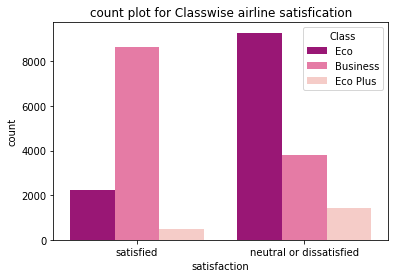

In [16]:
# count plot for Classwise airline satisfication
sns.countplot(x='satisfaction',hue='Class',data=airline_df,palette='RdPu_r')
plt.title("count plot for Classwise airline satisfication")
plt.show()

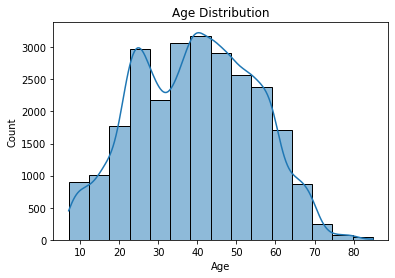

In [17]:
sns.histplot(data=airline_df, x="Age", kde=True,bins = 15)
plt.title('Age Distribution')
plt.show()

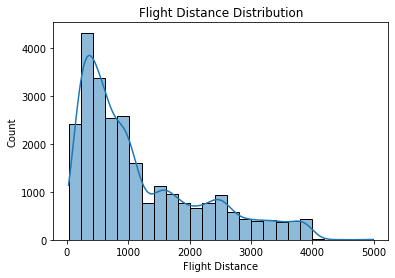

In [18]:
sns.histplot(data=airline_df, x="Flight Distance", kde=True,bins = 25)
plt.title('Flight Distance Distribution')
plt.show()

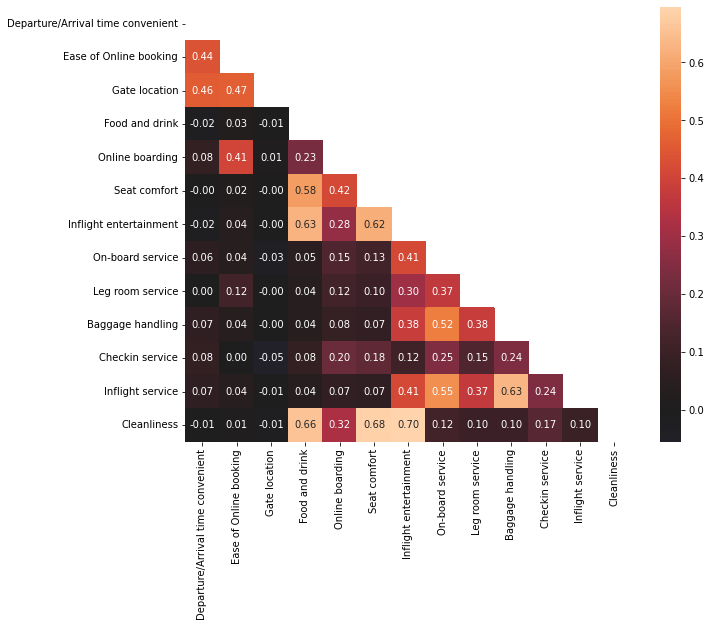

In [19]:
# adding all ratings columns to Correlation
rating_cols = airline_df.columns[8:-3]

corr =  airline_df[rating_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=False)
# in the below matrix we can able notice that cleanliness satisfaction correlates with
# food and drinks,seat comfort,inflight entertrainment. Seems the overall cleanliness improve the flight experience

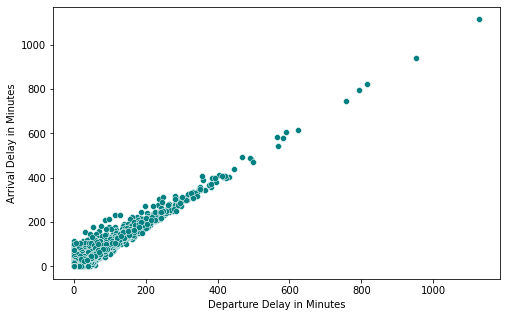

In [20]:
# scatterplot for identify the relationship between departure delay and arrival delay
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = airline_df, color = 'teal')
plt.show()

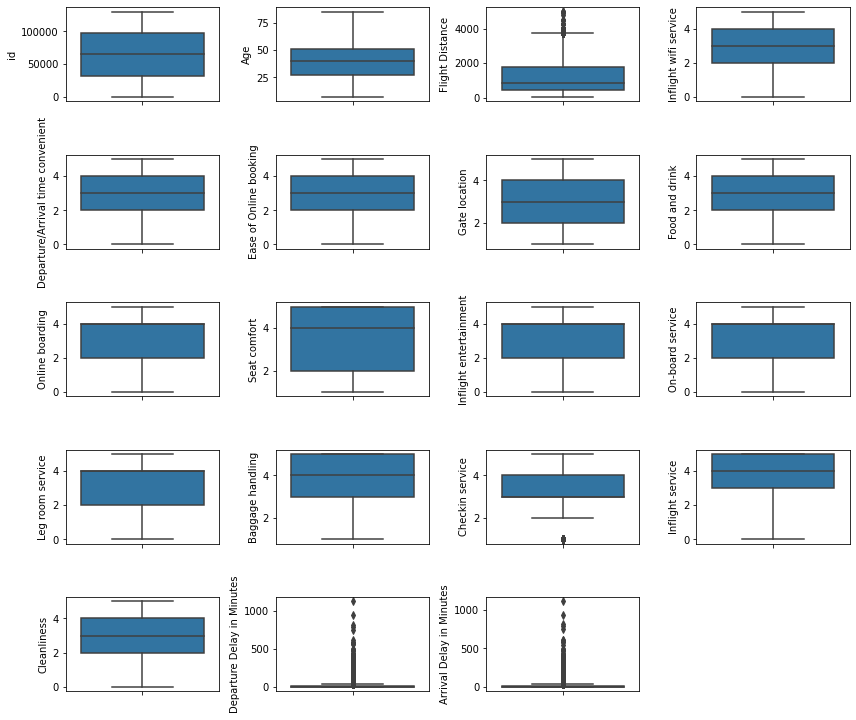

In [21]:
# Outlier Deduction
# selecting the newmerical futures
numerical_features = airline_df.select_dtypes(exclude=['object']).copy()

# box plot for outlier deduction
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()
# In the below we don't see any outliers. Flight distance, Arrival delay in mins and departure delay in mins
# can't considered as outliers since it is distance, time in delay which impacts the dependent variable

In [22]:
# function to identify outlier values

def identify_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [23]:
# To identity the outliers
outlier_df = airline_df.loc[identify_outliers(airline_df,numerical_features.columns)]
# To drop outliers
# airline_df = airline_df.drop(identify_outliers(airline_df,numerical_features.columns))
outlier_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
145,7237,Female,Loyal Customer,53,Business travel,Business,3769,3,1,5,...,2,4,3,4,1,2,1,180,178.0,neutral or dissatisfied
853,4380,Female,Loyal Customer,52,Business travel,Business,3894,1,1,1,...,5,5,5,3,1,5,2,0,50.0,satisfied
946,103160,Male,Loyal Customer,40,Business travel,Business,3799,2,2,5,...,5,5,5,5,3,5,3,81,96.0,satisfied
1279,37388,Female,Loyal Customer,32,Business travel,Business,3880,3,3,3,...,3,2,5,1,5,2,5,146,171.0,satisfied
1358,129730,Female,Loyal Customer,48,Business travel,Business,3801,4,4,2,...,4,4,4,4,3,4,2,100,94.0,neutral or dissatisfied


In [24]:
# To do one hot encode the categories
# added the parameter drop_first is true in one hot , always n-1 columns enough to explain the categories
airline_df = pd.get_dummies(airline_df, drop_first =True ,columns=["Class","Gender", "Customer Type", "Type of Travel", "satisfaction"],dtype = bool, sparse=True)

# Droping ID column because it is used only for identity key in database table
airline_df.drop(columns=['id'], inplace=True)

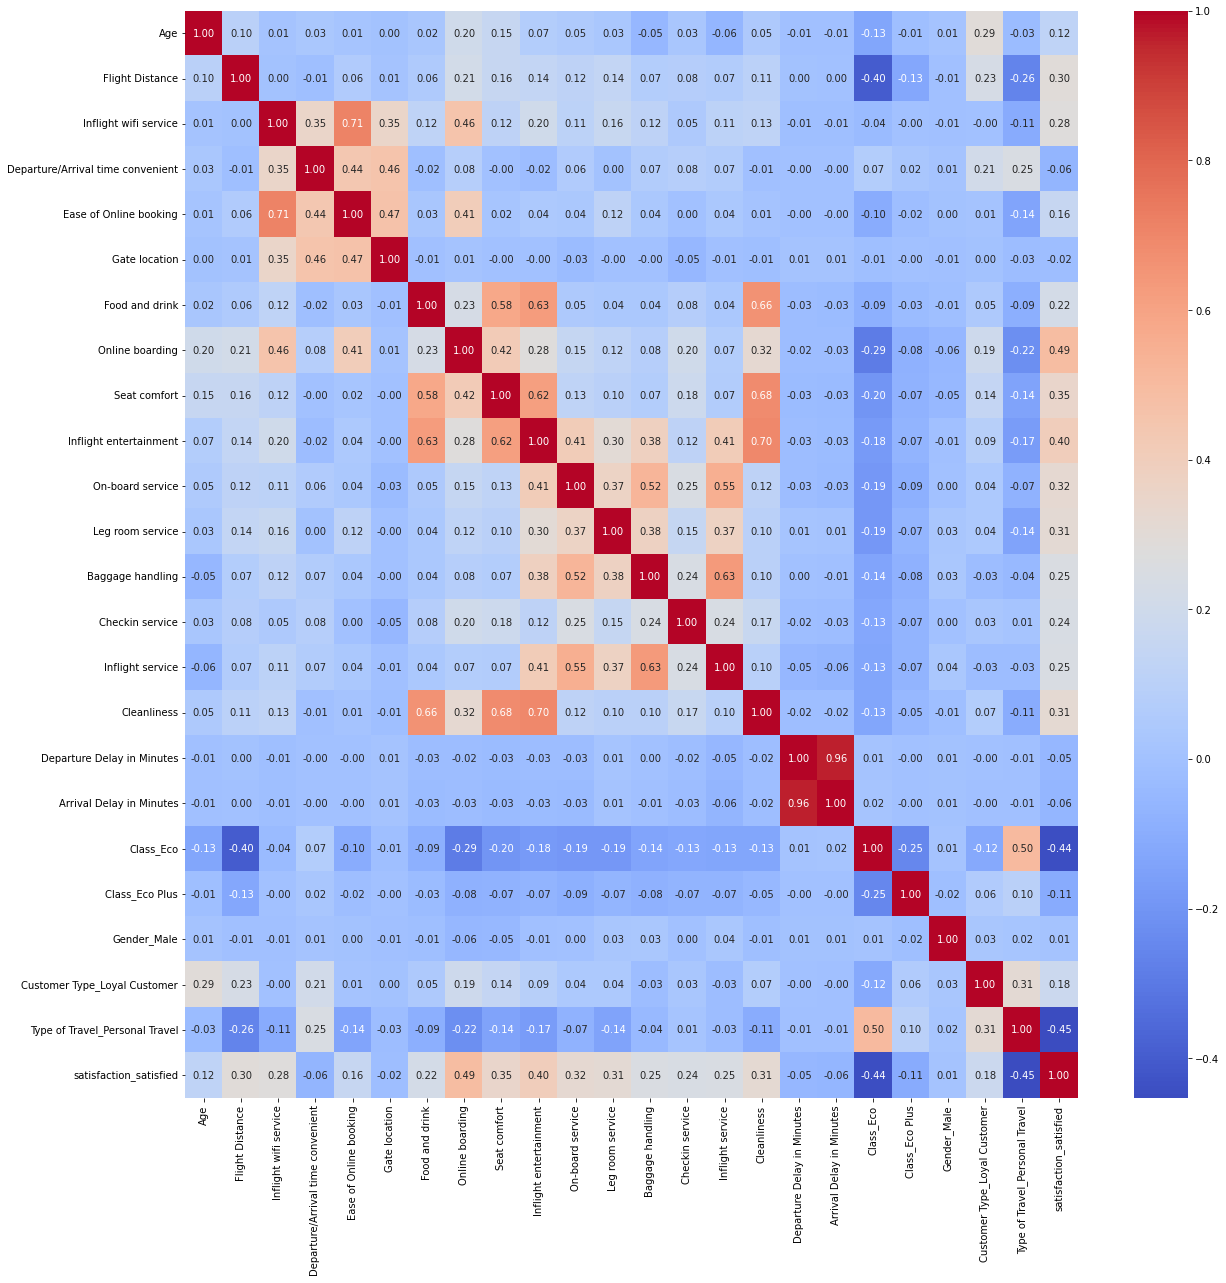

In [25]:
# Corelation Matrix
# added the parameter fmt =.2f for 2 decimal representation
plt.figure(figsize=(20,20))
sns.heatmap(airline_df[list(airline_df.columns)].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()
# In the below departure delay in min and arrival delay in min are highly correlated. 
# either one of this should removed to avoid Multicollinearity

In [26]:
# removing departure delay to avoid Multicollinearity
airline_df.drop('Departure Delay in Minutes', axis=1, inplace= True)

In [27]:
# spliting the data to dependent and independent variable
X = airline_df.iloc[:, :-1].values
y = airline_df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set. test size is 20 %
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# Feature Scaling
# there is no need to apply future scaling on dependent variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scalar = sc.fit(X_train)

# to save the scalar
joblib.dump(scalar,'../model/scalar.pkl')

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Define the model architecture
model = Sequential()

# Add the first hidden layer with 64 units and ReLU activation
model.add(Dense(units=64,  kernel_initializer = 'uniform', activation='relu'))

# Add the second hidden layer with 32 units and ReLU activation
model.add(Dense(units=32, kernel_initializer = 'uniform', activation='relu'))

# Add the output layer with 1 unit and sigmoid activation
model.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-03-16 14:18:20.621176: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-16 14:18:20.621237: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sabarish): /proc/driver/nvidia/version does not exist
2023-03-16 14:18:20.621586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
# Training the model ANN on the Training set
model_his = model.fit(X_train, np.array(y_train), batch_size = 32, epochs = 50,validation_split=0.2)

Epoch 1/50
518/518 [==============================] - 3s 5ms/step - loss: 0.3319 - accuracy: 0.8780 - val_loss: 0.2227 - val_accuracy: 0.9112
Epoch 2/50
518/518 [==============================] - 2s 3ms/step - loss: 0.1918 - accuracy: 0.9231 - val_loss: 0.1884 - val_accuracy: 0.9254
Epoch 3/50
518/518 [==============================] - 2s 4ms/step - loss: 0.1712 - accuracy: 0.9316 - val_loss: 0.1755 - val_accuracy: 0.9290
Epoch 4/50
518/518 [==============================] - 2s 4ms/step - loss: 0.1597 - accuracy: 0.9358 - val_loss: 0.1739 - val_accuracy: 0.9314
Epoch 5/50
518/518 [==============================] - 2s 4ms/step - loss: 0.1529 - accuracy: 0.9389 - val_loss: 0.1672 - val_accuracy: 0.9322
Epoch 6/50
518/518 [==============================] - 2s 4ms/step - loss: 0.1485 - accuracy: 0.9402 - val_loss: 0.1646 - val_accuracy: 0.9360
Epoch 7/50
518/518 [==============================] - 2s 5ms/step - loss: 0.1432 - accuracy: 0.9435 - val_loss: 0.1621 - val_accuracy: 0.9305
Epoch 

In [31]:
# Save the model
model.save('../model/ANN_model.h5')

In [32]:
#load the saved model and making predictions 
loaded_model = keras.models.load_model('../model/ANN_model.h5')

# predict the data and printind desired results
y_pred = loaded_model.predict(X_test)
# since ANN model return the continuous probability setting threshold value as 0.7 
y_pred = (y_pred > 0.7)
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

162/162 [==============================] - 0s 2ms/step
[[False False]
 [False False]
 [False False]
 ...
 [ True  True]
 [False False]
 [False False]]


In [33]:
# To print the accuracy score
print('ANN Model Accuracy - ',round(accuracy_score(np.array(y_test), y_pred)*100,2))

ANN Model Accuracy -  94.59


In [34]:
# Access the loss values
loss_values = model_his.history['loss']
val_loss_values = model_his.history['val_loss']

In [35]:
# Print the loss values for each epoch
for i, loss in enumerate(loss_values):
    print('Epoch {}: loss = {:.4f}, val_loss = {:.4f}'.format(i+1, loss, val_loss_values[i]))

Epoch 1: loss = 0.3319, val_loss = 0.2227
Epoch 2: loss = 0.1918, val_loss = 0.1884
Epoch 3: loss = 0.1712, val_loss = 0.1755
Epoch 4: loss = 0.1597, val_loss = 0.1739
Epoch 5: loss = 0.1529, val_loss = 0.1672
Epoch 6: loss = 0.1485, val_loss = 0.1646
Epoch 7: loss = 0.1432, val_loss = 0.1621
Epoch 8: loss = 0.1391, val_loss = 0.1591
Epoch 9: loss = 0.1349, val_loss = 0.1640
Epoch 10: loss = 0.1295, val_loss = 0.1547
Epoch 11: loss = 0.1264, val_loss = 0.1459
Epoch 12: loss = 0.1215, val_loss = 0.1499
Epoch 13: loss = 0.1181, val_loss = 0.1409
Epoch 14: loss = 0.1149, val_loss = 0.1375
Epoch 15: loss = 0.1115, val_loss = 0.1384
Epoch 16: loss = 0.1076, val_loss = 0.1427
Epoch 17: loss = 0.1043, val_loss = 0.1292
Epoch 18: loss = 0.1008, val_loss = 0.1368
Epoch 19: loss = 0.0986, val_loss = 0.1301
Epoch 20: loss = 0.0958, val_loss = 0.1288
Epoch 21: loss = 0.0933, val_loss = 0.1293
Epoch 22: loss = 0.0916, val_loss = 0.1224
Epoch 23: loss = 0.0907, val_loss = 0.1269
Epoch 24: loss = 0.0

[[2798  103]
 [ 177 2099]]


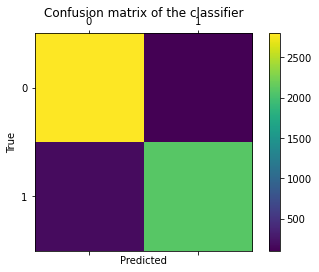

In [36]:
# confusion matrix for the predictions
cm = confusion_matrix(np.array(y_test), y_pred)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# prediction
ip_json = {
            "id" : 22345,
            "Gender" : "Male",
            "Customer Type" : "Loyal Customer",
            "Age" : 44,
            "Type of Travel" : "Business travel",
            "Class" : "Eco",
            "Flight Distance" : 2450,
            "Inflight wifi service" : 4,
            "Departure/Arrival time convenient" : 2,
            "Ease of Online booking" : 4,
            "Gate location" : 3,
            "Food and drink" : 2,
            "Online boarding" : 4,
            "Seat comfort": 5,
            "Inflight entertainment" : 3,
            "On-board service" : 4,
            "Leg room service" : 3,
            "Baggage handling" : 4,
            "Checkin service" : 3,
            "Inflight service" : 4,
            "Cleanliness" : 4,
            "Departure Delay in Minutes" : 10,
            "Arrival Delay in Minutes" : 5
       }

In [38]:
# One hot columns and respective values
ONEHOT_LIST = ["Class","Gender","Customer Type","Type of Travel"]
INPUT_ONEHOT = [['Eco','Business','Eco Plus'],['Female','Male'],['Loyal Customer','Disloyal Customer'],
                ['Business travel','Personal Travel']]
SORTED_COLUMNS = ['Age','Flight Distance','Inflight wifi service','Departure/Arrival time convenient',
                  'Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort',
                  'Inflight entertainment','On-board service','Leg room service','Baggage handling',
                  'Checkin service','Inflight service','Cleanliness','Arrival Delay in Minutes','Class_Eco',
                  'Class_Eco Plus','Gender_Male','Customer Type_Loyal Customer','Type of Travel_Personal Travel']

# Creating onehot list
data = {}
for i in range(0,len(ONEHOT_LIST)):
    for j in INPUT_ONEHOT[i]:  
        if j in ip_json[ONEHOT_LIST[i]]:
            data[ONEHOT_LIST[i]+'_'+ j] = [1]
        else:
            data[ONEHOT_LIST[i]+'_'+ j] = [0]
            
data

{'Class_Eco': [1],
 'Class_Business': [0],
 'Class_Eco Plus': [0],
 'Gender_Female': [0],
 'Gender_Male': [1],
 'Customer Type_Loyal Customer': [1],
 'Customer Type_Disloyal Customer': [0],
 'Type of Travel_Business travel': [1],
 'Type of Travel_Personal Travel': [0]}

In [39]:
# Merging input data and one hot list and converting as dataframe
result = merge(ip_json, data)
df = pd.DataFrame(data=result)

# Sorting columns for model prediction
df = df[SORTED_COLUMNS]
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel
0,44,2450,4,2,4,3,2,4,5,3,...,4,3,4,4,5,1,0,1,1,0


In [40]:
# load the saved scalor to transform the data
scalar = joblib.load('../model/scalar.pkl')

modelIP = scalar.transform(df.values)

# predict the data and printind desired results
y_pred = loaded_model.predict(modelIP)
y_pred = (y_pred > 0.7)
print("Model OP - ",np.concatenate((y_pred.reshape(len(y_pred),1))))

1/1 [==============================] - 0s 28ms/step
Model OP -  [ True]


In [41]:
if y_pred == True :
    print("satisfied")
else:
    print("neutral or dissatisfied")

satisfied
